*pratik gaikwad*

In [266]:
# libraries for extract, manipulate,and analysis
import numpy as np
import pandas as pd

# labraries for visulaization 
import matplotlib.pyplot as plt
import seaborn as sns

# labraries for stats
import scipy.stats
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore

# train test split
from sklearn.model_selection import train_test_split

In [267]:
# data gathering 
df=pd.read_json("iris.json")
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### EDA (Exploratory Data Analysis)

In [269]:
# check number of rows and columns
df.shape

(150, 5)

In [270]:
# check the size of dataset
df.size

750

In [271]:
# check the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [272]:
#check the statistics 
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [273]:
# check the datatype of each column
df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
species         object
dtype: object

In [274]:
df.isna().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

#### Analysis of sepalLength column

In [276]:
# create a function to calculate statistical valur of any perticular column
from scipy.stats import skew, mode
def cal_stats(data, column_name):
    column = data[column_name]
    # Calculating statistics
    stats = {
        'Mean': column.mean(),
        'Median': column.median(),
        'Mode': mode(column)[0],
        'Min': column.min(),
        'Max': column.max(),
        'Range': column.max() - column.min(),
        'Variance': column.var(),
        'Standard Deviation': column.std(),
        'Skewness': skew(column),
    } 
    df1=pd.DataFrame.from_dict(stats,orient='index')
    return df1

In [277]:
#Summary Statistics
# calculate Summary Statistics of sepalLenght column
cal_stats(df,'sepalLength')

,0
Mean,5.843333
Median,5.800000
Mode,5.000000
Min,4.300000
Max,7.900000
Range,3.600000
Variance,0.685694
Standard Deviation,0.828066
Skewness,0.311753


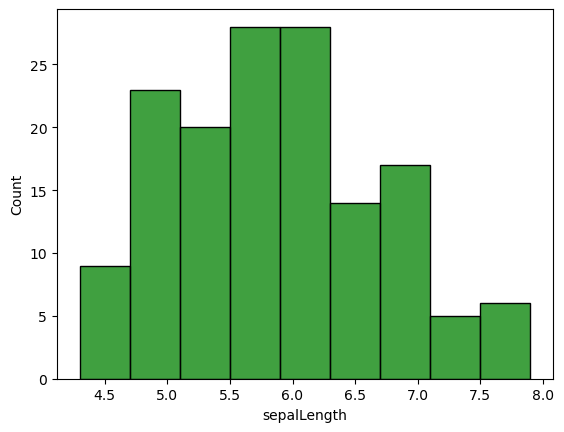

In [278]:
#Distribution Analysis
# Visualize the distribution of the column using histogram 
sns.histplot(df["sepalLength"], color = "Green")
plt.show()

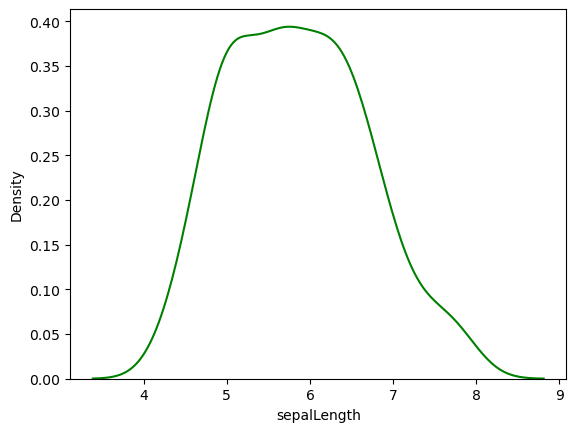

In [279]:
# Visualize the distribution of the column using Density Plot
sns.kdeplot(df['sepalLength'], color='Green')
plt.show()

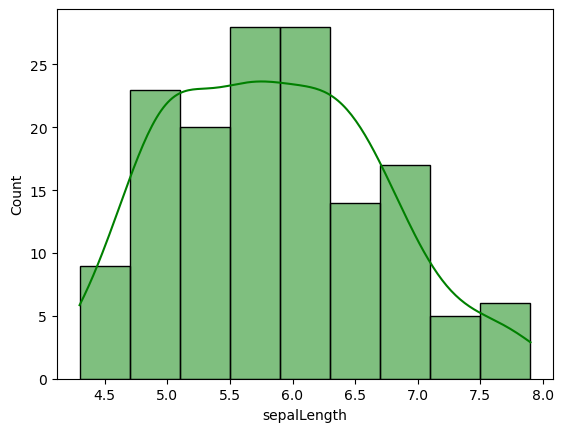

In [280]:
# Visualize the distribution of the column using hisplot (combination of histograme anf kde plot)
sns.histplot(df["sepalLength"], kde = True, color = "Green")
plt.show()

In [281]:
# create one function to check and handle outlier
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(df, col):
    sns.boxplot(df[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")    
    print(df.head())

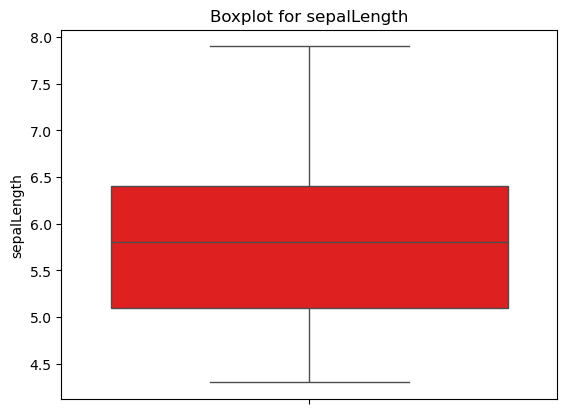

25% Quantile q1 = 5.1
75% Quantile q3 = 6.4
IQR = 1.3000000000000007

--------------------------------------------------------------------------------
Lower Tail = 3.1499999999999986
Upper Tail = 8.350000000000001
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [sepalLength, sepalWidth, petalLength, petalWidth, species]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


In [282]:
#checking and handling of outliers using function
Checking_and_Handling_Of_Outliers(df,"sepalLength")

#### Analysis of sepalWidth column

In [284]:
cal_stats(df,'sepalWidth')

,0
Mean,3.057333
Median,3.000000
Mode,3.000000
Min,2.000000
Max,4.400000
Range,2.400000
Variance,0.189979
Standard Deviation,0.435866
Skewness,0.315767


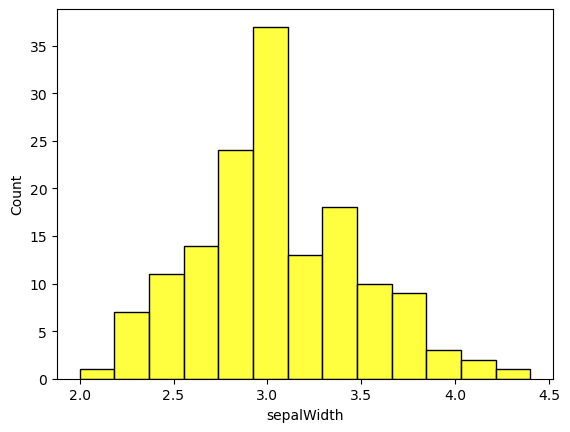

In [285]:
sns.histplot(df["sepalWidth"], color = "Yellow")
plt.show()

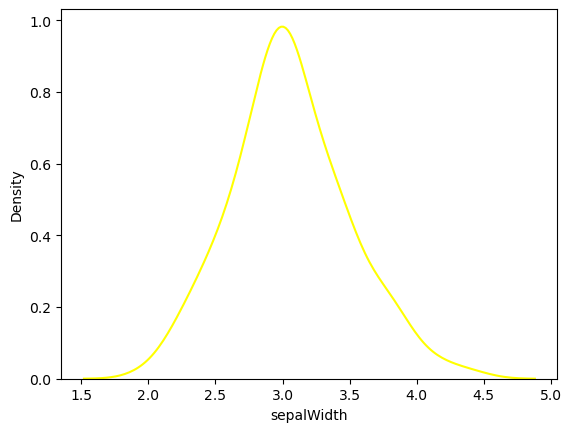

In [286]:
sns.kdeplot(df['sepalWidth'], color='Yellow')
plt.show()

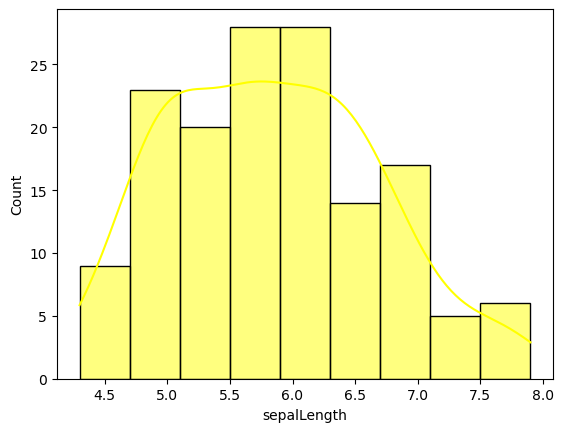

In [287]:
sns.histplot(df["sepalLength"], kde = True, color = "Yellow")
plt.show()

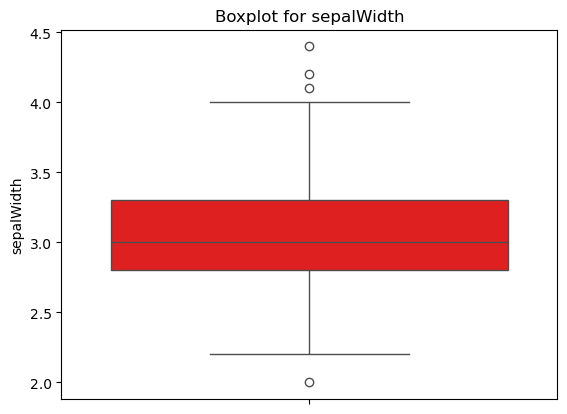

25% Quantile q1 = 2.8
75% Quantile q3 = 3.3
IQR = 0.5

--------------------------------------------------------------------------------
Lower Tail = 2.05
Upper Tail = 4.05
--------------------------------------------------------------------------------

Outliers :
     sepalLength  sepalWidth  petalLength  petalWidth     species
15          5.7         4.4          1.5         0.4      setosa
32          5.2         4.1          1.5         0.1      setosa
33          5.5         4.2          1.4         0.2      setosa
60          5.0         2.0          3.5         1.0  versicolor
--------------------------------------------------------------------------------
After handling of Outliers data:

   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  s

In [288]:
Checking_and_Handling_Of_Outliers(df,"sepalWidth")

#### Analysis of petalLength column

In [290]:
cal_stats(df,"petalLength")

,0
Mean,3.758000
Median,4.350000
Mode,1.400000
Min,1.000000
Max,6.900000
Range,5.900000
Variance,3.116278
Standard Deviation,1.765298
Skewness,-0.272128


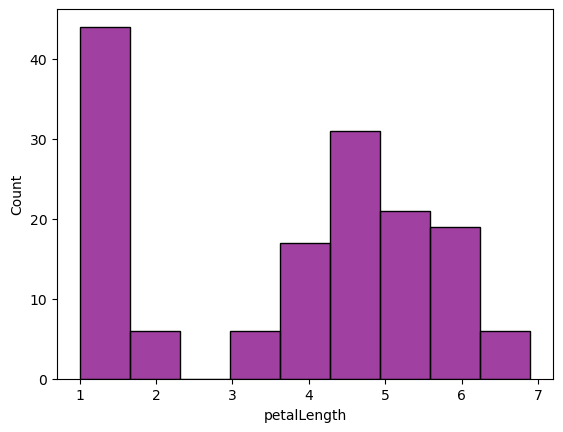

In [291]:
sns.histplot(df["petalLength"], color = "Purple")
plt.show()

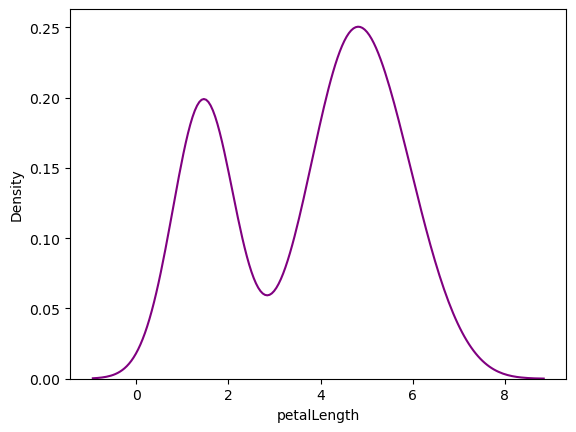

In [292]:
sns.kdeplot(df['petalLength'], color='Purple')
plt.show()

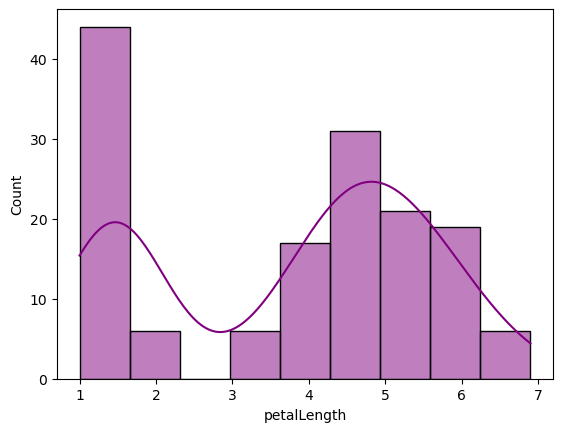

In [293]:
sns.histplot(df["petalLength"], kde = True, color = "Purple")
plt.show()

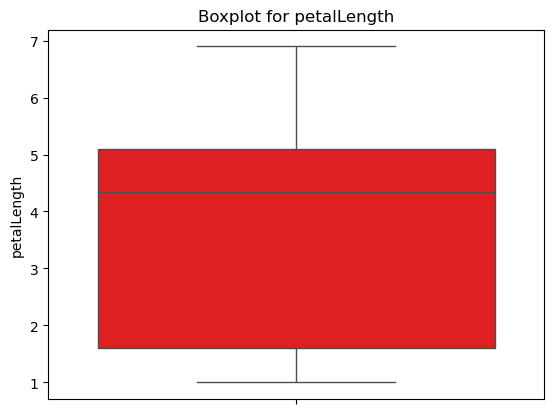

25% Quantile q1 = 1.6
75% Quantile q3 = 5.1
IQR = 3.4999999999999996

--------------------------------------------------------------------------------
Lower Tail = -3.649999999999999
Upper Tail = 10.349999999999998
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [sepalLength, sepalWidth, petalLength, petalWidth, species]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


In [294]:
Checking_and_Handling_Of_Outliers(df,"petalLength")

#### Analysis of petalWidth column

In [296]:
cal_stats(df,"petalWidth")

,0
Mean,1.199333
Median,1.300000
Mode,0.200000
Min,0.100000
Max,2.500000
Range,2.400000
Variance,0.581006
Standard Deviation,0.762238
Skewness,-0.101934


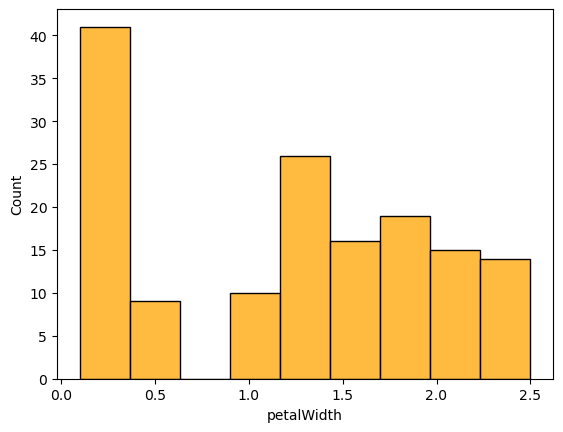

In [297]:
sns.histplot(df["petalWidth"], color = "Orange")
plt.show()

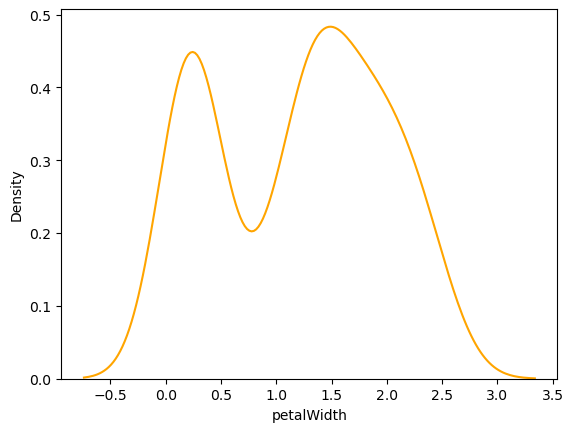

In [298]:
sns.kdeplot(df['petalWidth'], color='Orange')
plt.show()

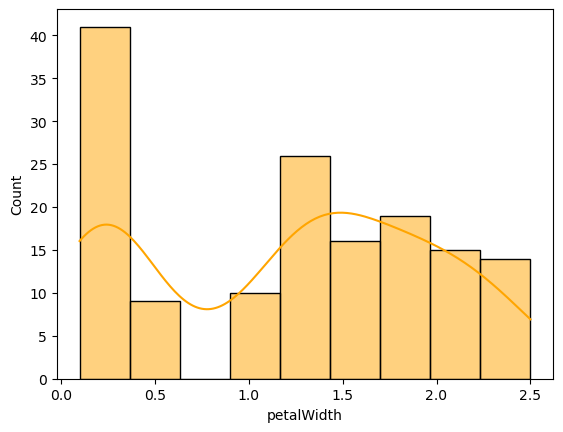

In [299]:
sns.histplot(df["petalWidth"], kde = True, color = "Orange")
plt.show()

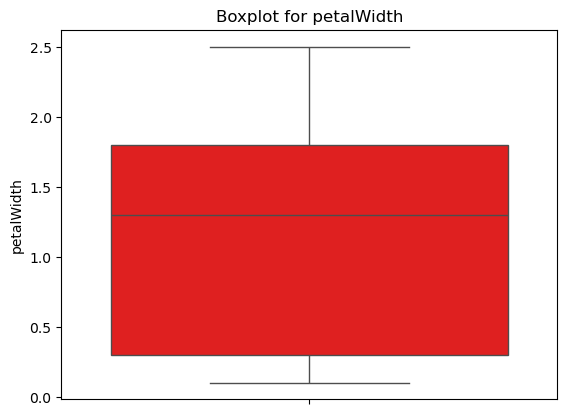

25% Quantile q1 = 0.30000000000000004
75% Quantile q3 = 1.8
IQR = 1.5

--------------------------------------------------------------------------------
Lower Tail = -1.95
Upper Tail = 4.05
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [sepalLength, sepalWidth, petalLength, petalWidth, species]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


In [300]:
Checking_and_Handling_Of_Outliers(df,"petalWidth")

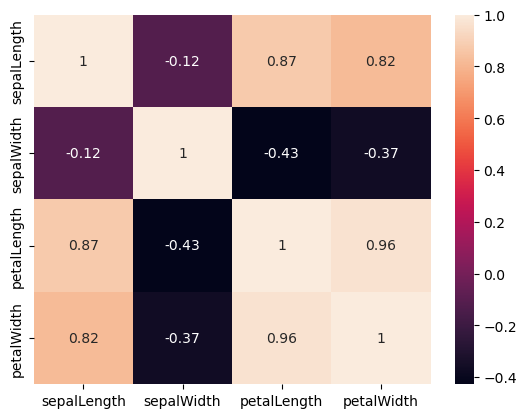

In [301]:
sns.heatmap(df.iloc[ : , :4].corr(),annot=True)
plt.show()

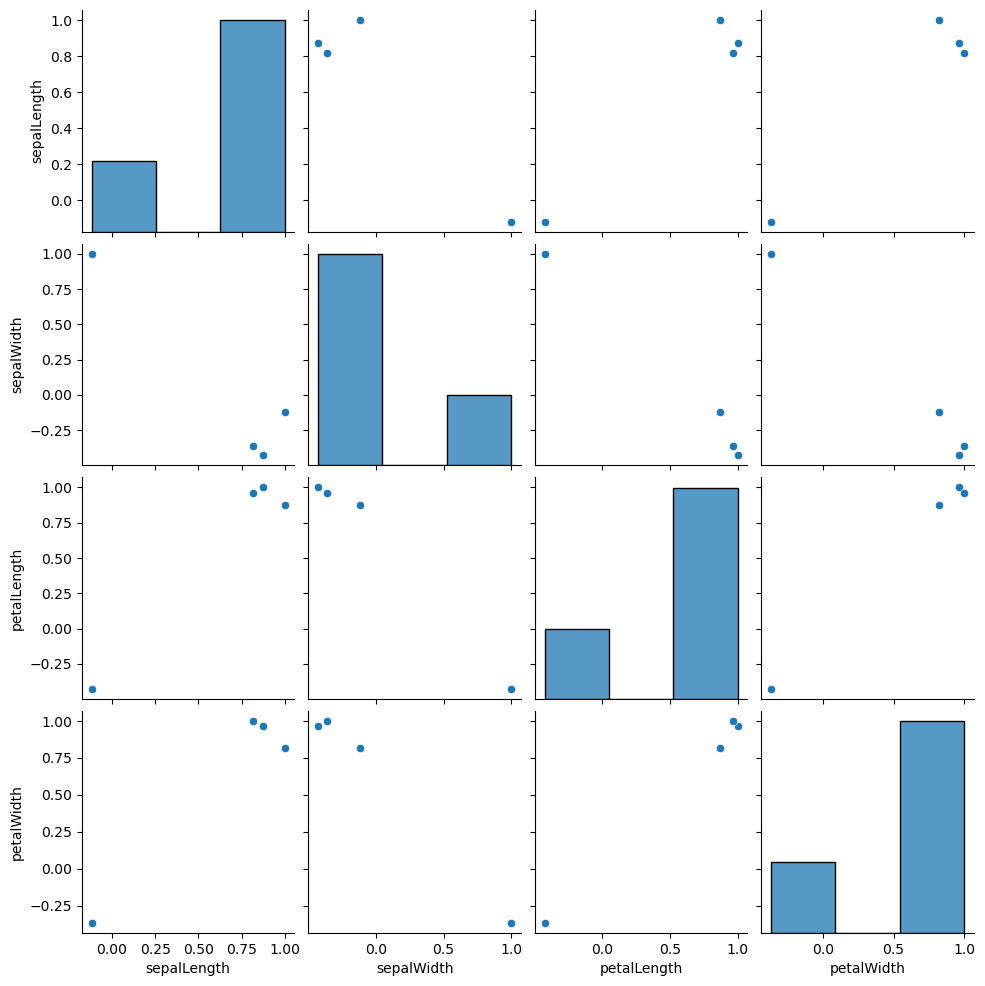

In [302]:
sns.pairplot(df.iloc[:,:4].corr())
plt.show()

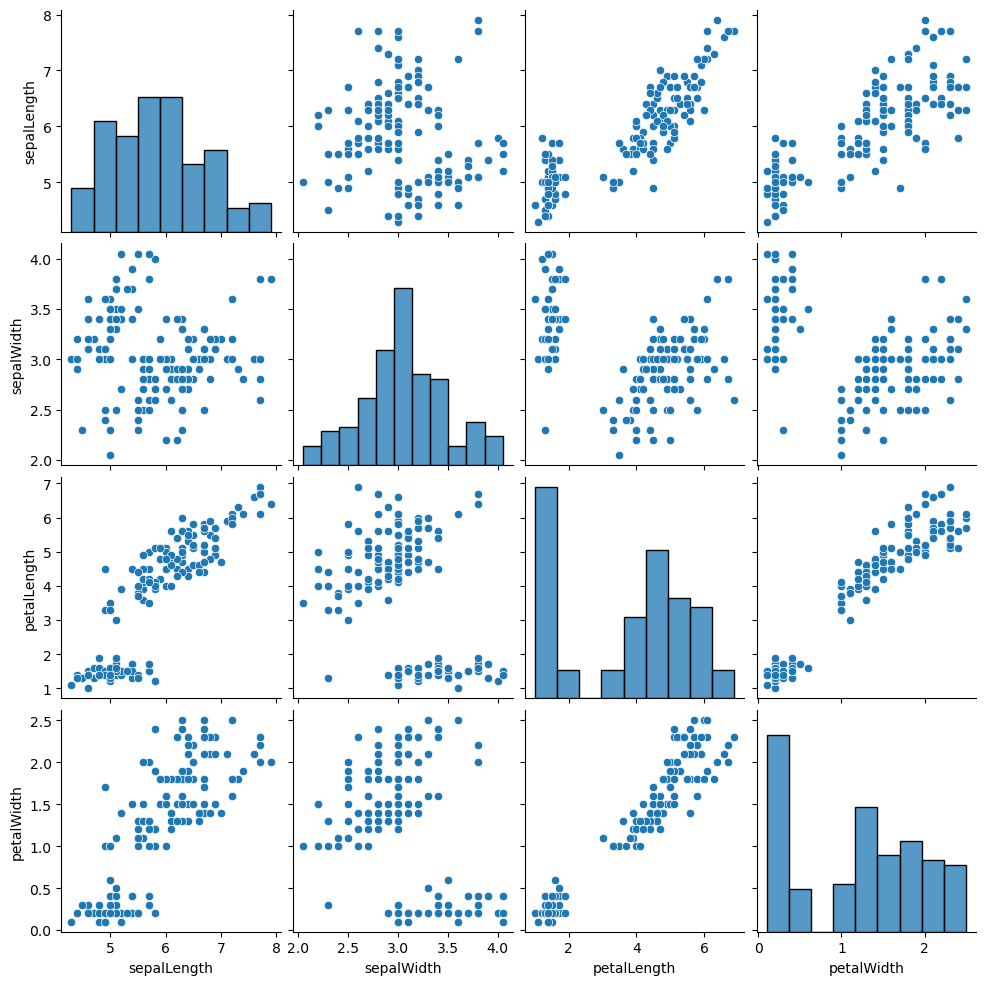

In [303]:
#multivariate analysis
sns.pairplot(df)

#### Analysis of species column

In [305]:
unique=df['species'].unique()
unique

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [306]:
val_count=df['species'].value_counts()
val_count

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [307]:
percentage=df['species'].value_counts(normalize=True) * 100
percentage

species
setosa        33.333333
versicolor    33.333333
virginica     33.333333
Name: proportion, dtype: float64

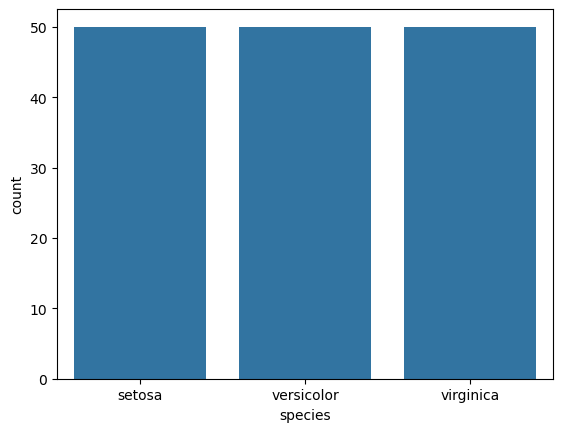

In [308]:
sns.countplot(data=df, x='species')
plt.show()

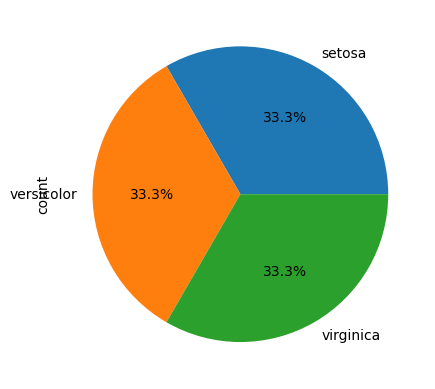

In [309]:
val_count.plot.pie(autopct='%1.1f%%')
plt.show()

In [310]:
df['species'].isna().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

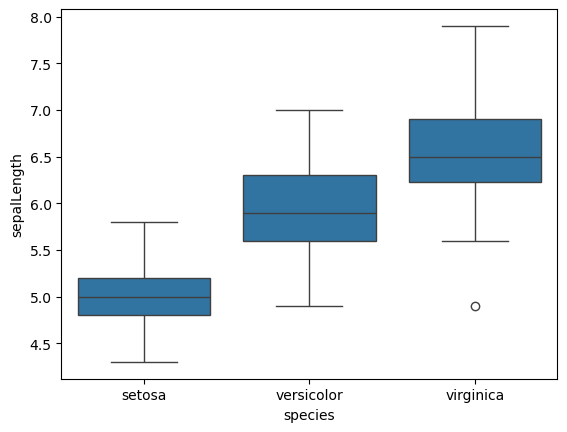

In [311]:
sns.boxplot(data=df, x='species', y='sepalLength')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

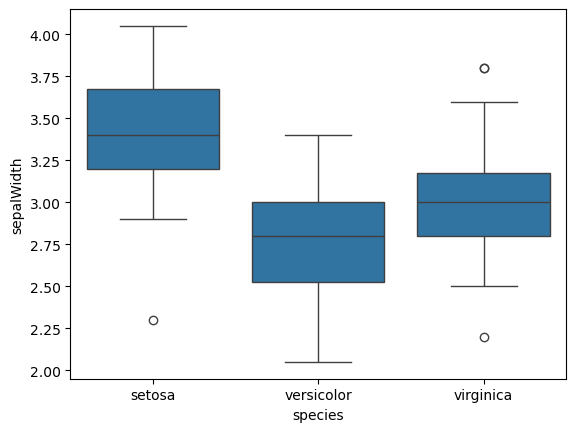

In [312]:
sns.boxplot(data=df, x='species', y='sepalWidth')
plt.show

C:\Users\icon\AppData\Local\Temp\ipykernel_10588\2398942769.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y='petalLength',palette='muted')


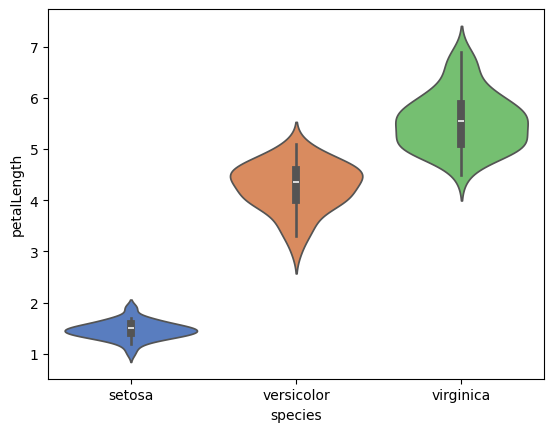

In [313]:
sns.violinplot(data=df, x='species', y='petalLength',palette='muted')
plt.show()

C:\Users\icon\AppData\Local\Temp\ipykernel_10588\3233483605.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y='petalWidth',palette='muted')


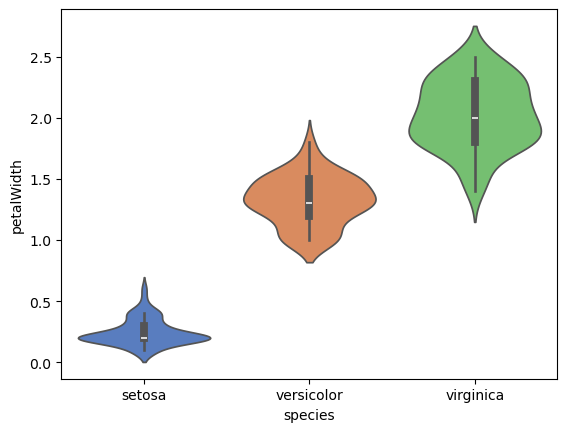

In [314]:
sns.violinplot(data=df, x='species', y='petalWidth',palette='muted')
plt.show()

In [315]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [316]:
df['species']=df['species'].replace({'setosa':1, 'versicolor':2, 'virginica':3})

C:\Users\icon\AppData\Local\Temp\ipykernel_10588\3135328397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species']=df['species'].replace({'setosa':1, 'versicolor':2, 'virginica':3})


In [317]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [318]:
x=df.iloc[ : , :4]
y=df['species']

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print("Training Data (x_train):")
print(x_train)
print("\nTest Data (x_test):")
print(x_test)

Training Data (x_train):
     sepalLength  sepalWidth  petalLength  petalWidth
14           5.8         4.0          1.2         0.2
61           5.9         3.0          4.2         1.5
125          7.2         3.2          6.0         1.8
119          6.0         2.2          5.0         1.5
6            4.6         3.4          1.4         0.3
..           ...         ...          ...         ...
46           5.1         3.8          1.6         0.2
42           4.4         3.2          1.3         0.2
1            4.9         3.0          1.4         0.2
100          6.3         3.3          6.0         2.5
29           4.7         3.2          1.6         0.2

[120 rows x 4 columns]

Test Data (x_test):
     sepalLength  sepalWidth  petalLength  petalWidth
134          6.1        2.60          5.6         1.4
140          6.7        3.10          5.6         2.4
58           6.6        2.90          4.6         1.3
110          6.5        3.20          5.1         2.0
104         

In [320]:
x_train.shape

(120, 4)

In [321]:
x_test.shape

(30, 4)

In [322]:
y_train.shape

(120,)

In [323]:
y_test.shape

(30,)